In [1]:
import sys
import os
import matplotlib.pyplot as plt

import torch
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from utils.custom_datasets import DelightClassic, DelightClassicOptimized

In [2]:
transformations = {0: "Original",
                   1: "Rotation 90°",
                   2: "Rotation 180°",
                   3: "Rotation 270°",
                   4: "Horizontal Flip",
                   5: "Horizontal Flip + Rotation 90°",
                   6: "Horizontal Flip + Rotation 180°",
                   7: "Horizontal Flip + Rotation 270°",
                   }

In [3]:
data = np.load("..\data\SERSIC\X_train_augmented_x30.npz")

images_multi  = torch.tensor(data['imgs'])
sn_pos  = torch.tensor(data['pos'])

In [4]:
dataset_delight=  DelightClassic(
                                imgs = images_multi,
                                sn_pos = sn_pos)

In [5]:
dataset_optim =  DelightClassicOptimized(
                                imgs = images_multi,
                                sn_pos = sn_pos)

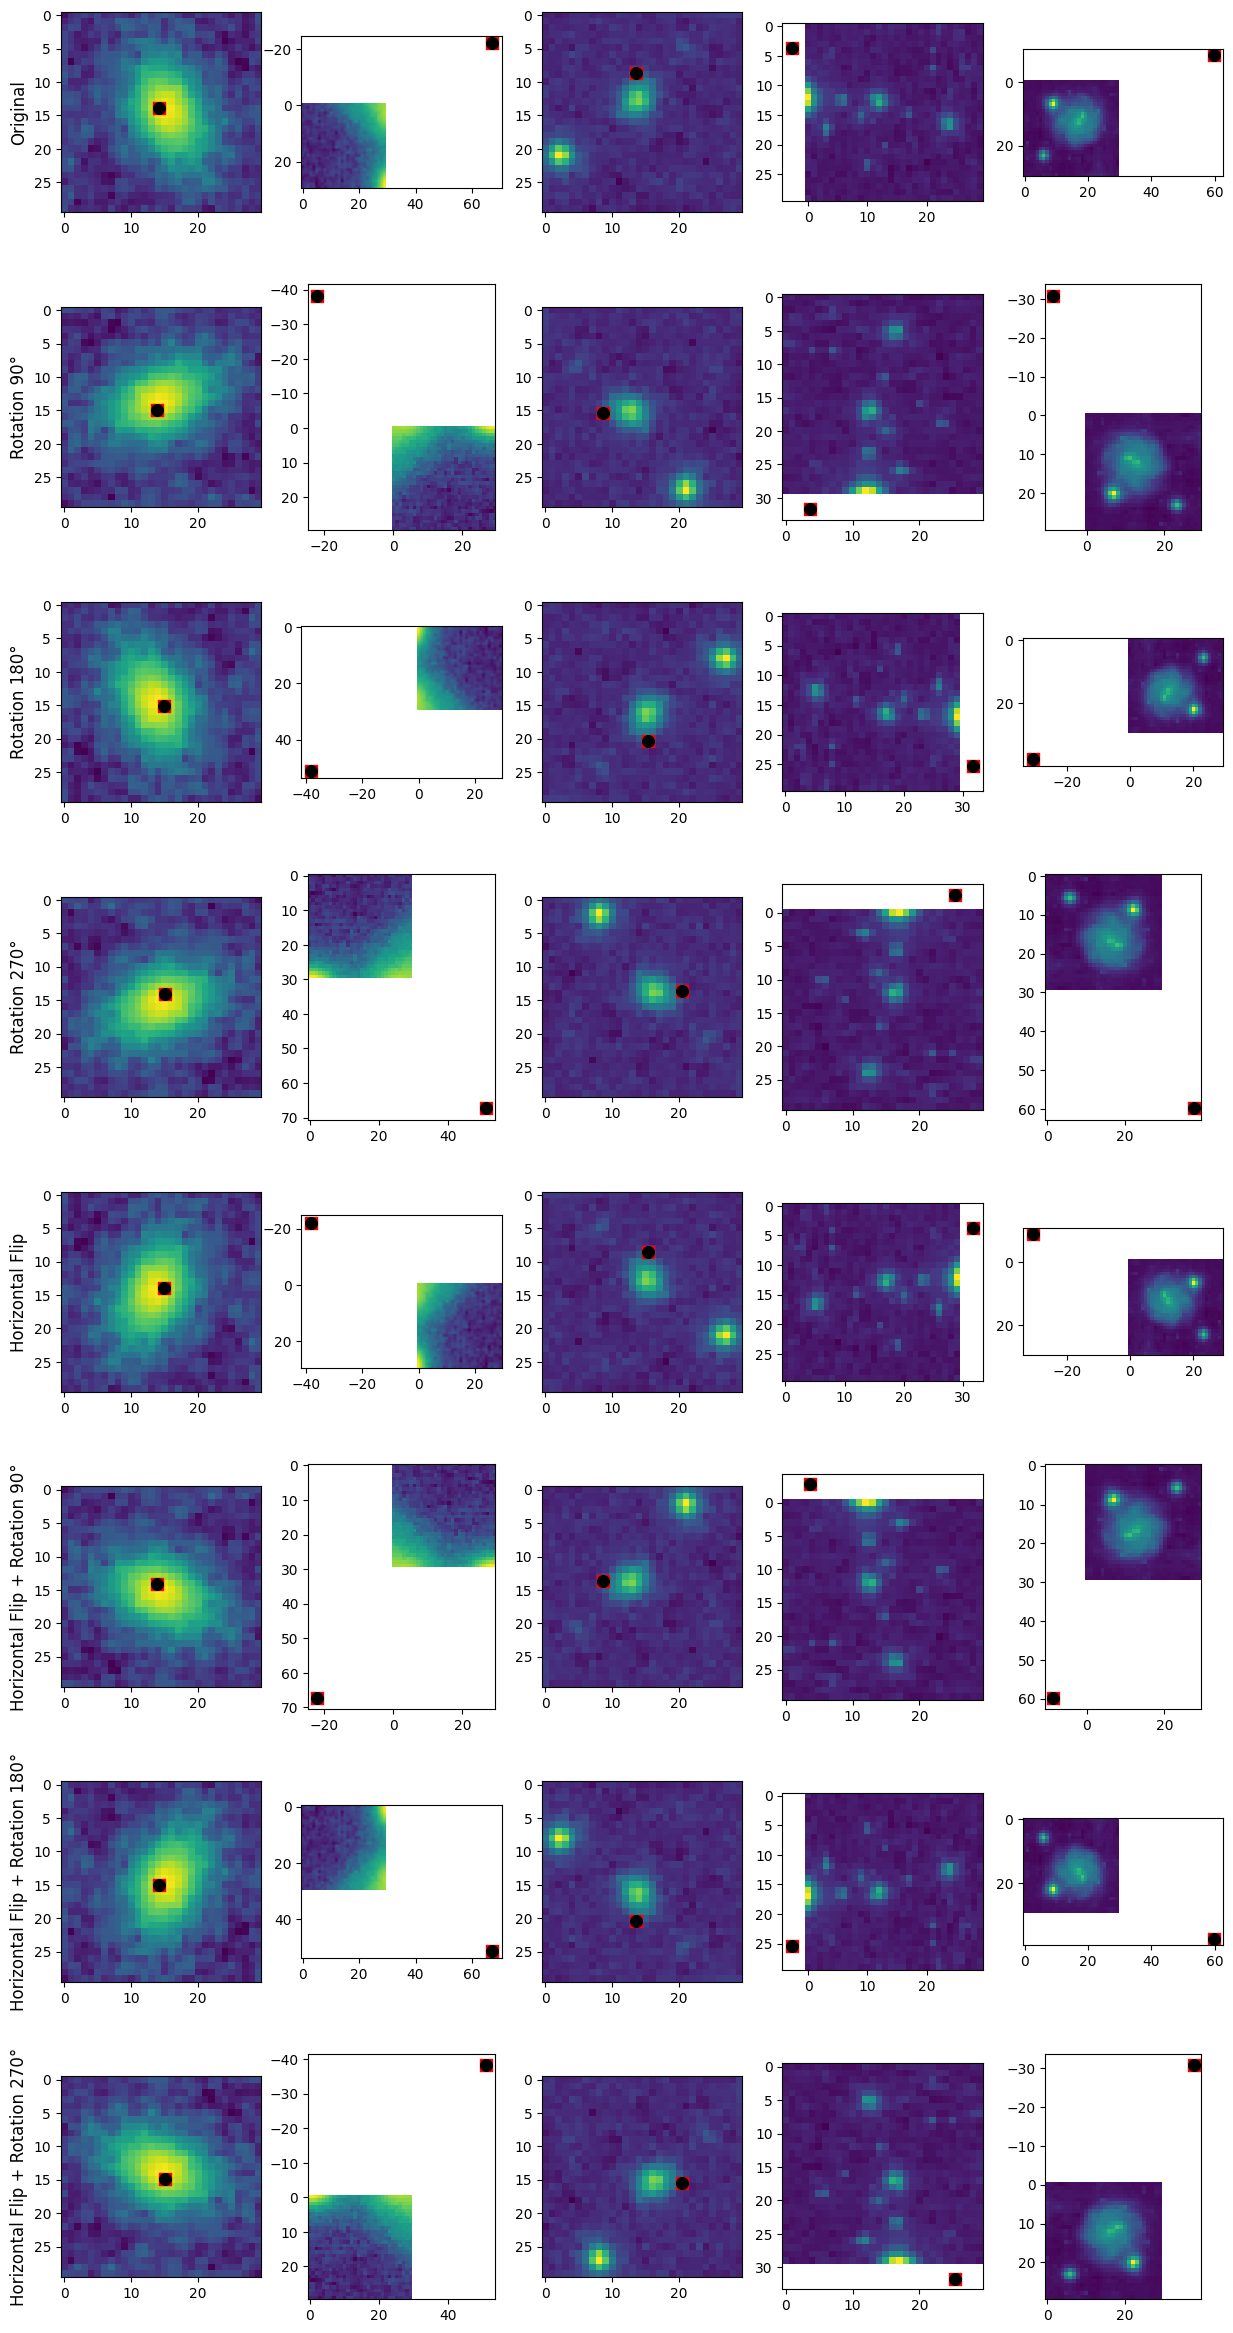

In [6]:
rand_idxs = np.random.randint(0, len(dataset_optim), size=5)

fig, axs = plt.subplots(8,5, figsize=(15,30))

for ex, idx in enumerate(rand_idxs):

    img = dataset_delight[idx][0]
    pos_normal = dataset_delight[idx][1]
    pos_optim = dataset_optim[idx][1]

    centros = np.array([[14,14],[14,15],[15,15],[15,14],[15,14],[14,14],[14,15],[15,15]])

    for i, (pos, trans_name) in enumerate(transformations.items()):

        axs[pos][ex].imshow(img[pos][ex][0])
        axs[pos][ex].scatter((pos_optim[pos][0]/(2**0) + centros[i][0]) , (pos_optim[pos][1]/(2**0)+ centros[i][1]), s=70, color="red",marker="s")
        axs[pos][ex].scatter((pos_normal[pos][0]/(2**0) + centros[i][0]) , (pos_normal[pos][1]/(2**0)+ centros[i][1]), s=70, color="black")

        axs[pos][0].set_ylabel(trans_name, fontsize=12)  # título a la izquierda

plt.show()